In [2]:
import pandas as pd

In [23]:
#Import the dataset from this drinks.csv
#Assign it to a variable called drinks.
drinks=pd.read_csv("drinks.csv")
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
drinks["continent"].fillna('Unknown',inplace=True)

In [7]:
drinks["continent"].isnull().sum()

0

In [8]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [9]:
#Which continent drinks more beer on average?
drinks.groupby("continent").agg({"beer_servings":"mean"}).sort_values(by="beer_servings",ascending=False).idxmax()

beer_servings    EU
dtype: object

In [39]:
#For each continent print the statistics for wine consumption.
df=drinks.groupby("continent")["wine_servings"].describe()
df

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


<Axes: xlabel='continent'>

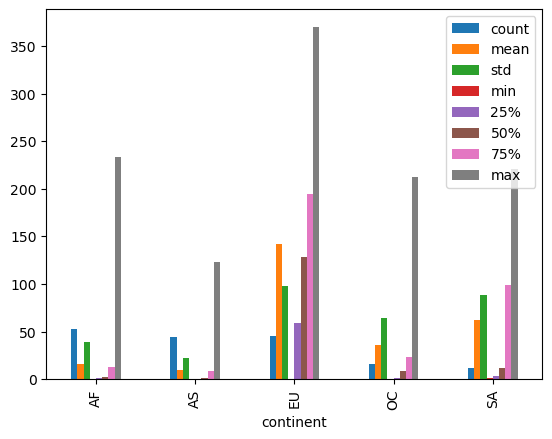

In [40]:
df.plot(kind='bar')

In [28]:
#Print the mean alcohol consumption per continent for every column
drinks.groupby('continent')[['beer_servings','wine_servings','spirit_servings','total_litres_of_pure_alcohol']].mean()

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.264151,16.339623,3.007547
AS,37.045455,9.068182,60.840909,2.170455
EU,193.777778,142.222222,132.555556,8.617778
OC,89.687500,35.625000,58.437500,3.381250
SA,175.083333,62.416667,114.750000,6.308333


In [29]:
#Print the median alcohol consumption per continent for every column
drinks.groupby('continent')[['beer_servings','wine_servings','spirit_servings','total_litres_of_pure_alcohol']].median()

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,2.0,3.0,2.30
AS,17.5,1.0,16.0,1.20
EU,219.0,128.0,122.0,10.00
OC,52.5,8.5,37.0,1.75
SA,162.5,12.0,108.5,6.85


In [36]:
#Print the mean, min and max values for spirit consumption.
drinks.groupby('continent')['spirit_servings'].agg(['mean','max','min'])

,mean,max,min
continent,,,
AF,16.339623,152,0
AS,60.840909,326,0
EU,132.555556,373,0
OC,58.437500,254,0
SA,114.750000,302,25
